In [2]:
import torch
# 사용안하면 run all cells하다가 마지막에 리스타트 오류남.
# CPU 에서 GPU 활성 하기
if torch.cuda.is_available():
    device = torch.device("cuda") # 목적지가 cuda device에 설정된다.
    print("CUDA(GPU)를 사용합니다.")
else:
    device = torch.device("cpu")
    print("CUDA(GPU)를 사용할 수 없으므로, cpu를 사용합니다.")

CUDA(GPU)를 사용합니다.


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               37376     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 48,257
Trainable params: 48,257
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


C:\Users\user\AppData\Local\Temp\ipykernel_24292\1539231207.py:8: DtypeWarning: Columns (4,5,6,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./encoded_data.csv')


65/65 [==============================] - 0s 1ms/step - loss: 48.9364 - mean_absolute_error: 3.4016
Epoch 2/100
65/65 [==============================] - 0s 1ms/step - loss: 0.5848 - mean_absolute_error: 0.5297
Epoch 3/100
65/65 [==============================] - 0s 1ms/step - loss: 0.3093 - mean_absolute_error: 0.3681
Epoch 4/100
65/65 [==============================] - 0s 1ms/step - loss: 0.1717 - mean_absolute_error: 0.2539
Epoch 5/100
65/65 [==============================] - 0s 1ms/step - loss: 0.1204 - mean_absolute_error: 0.2228
Epoch 6/100
65/65 [==============================] - 0s 1ms/step - loss: 0.0827 - mean_absolute_error: 0.1810
Epoch 7/100
65/65 [==============================] - 0s 1ms/step - loss: 0.0600 - mean_absolute_error: 0.1570
Epoch 8/100
65/65 [==============================] - 0s 1ms/step - loss: 0.0397 - mean_absolute_error: 0.1214
Epoch 9/100
65/65 [==============================] - 0s 1ms/step - loss: 0.0347 - mean_absolute_error: 0.1270
Epoch 10/100
65/65 [=

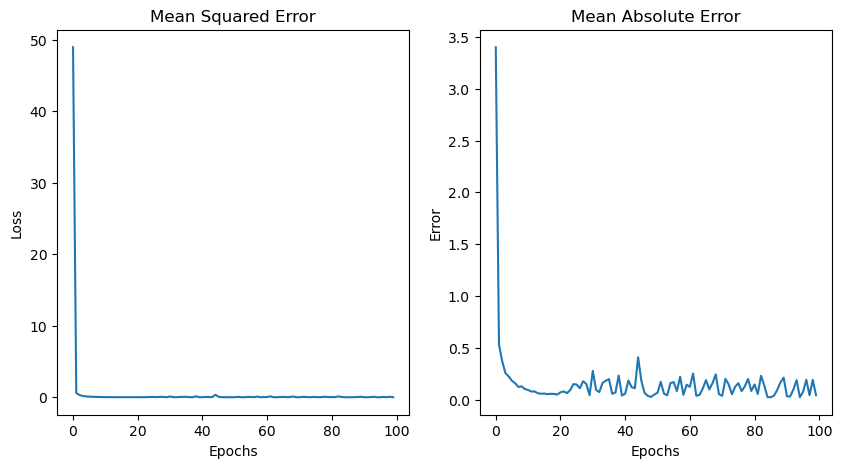

In [5]:
# 패키지 사용
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv('./encoded_data.csv')

# change_date 열을 제외한 나머지 열 선택
X = df.drop(columns=['change_date'])
y = df['change_date'].values # 예측값

# 결측값 처리 (예: 평균값으로 대체) #@!
X.replace('-', np.nan, inplace=True)
X = X.astype(np.float32)
X.fillna(X.mean(), inplace=True)

y = y.astype(np.float32)

# 모델 생성
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_dim=291, activation='relu'), # 입력계층 특성 수를 자동으로 설정
    tf.keras.layers.Dense(64, activation='relu'), # 은닉계층1
    tf.keras.layers.Dense(32, activation='relu'), # 은닉계층2
    tf.keras.layers.Dense(16, activation='relu'), # 은닉계층3
    tf.keras.layers.Dense(1, activation='linear') # 출력계층
])

# 회귀를 위한 손실 함수(mean squared error)와 메트릭스(mean absolute error) 사용하여 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

# 모델 정보(요약) 확인
model.summary()

# 시드 값 설정
seed = 123
tf.random.set_seed(seed)
np.random.seed(seed)

# 모델 학습
history = model.fit(X.values, y, epochs=100, batch_size=100)

# 학습 결과 시각화
plt.figure(figsize=(10, 5))

# subplot 1: Mean Squared Error 손실 함수의 변화
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.title('Mean Squared Error')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# subplot 2: Mean Absolute Error 매트릭스의 변화
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'])
plt.title('Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('Error')

plt.show()


In [6]:
# 손실 함수와 평균 절대 오차 값을 가져오기
loss_values = history.history['loss']
mean_absolute_error_values = history.history['mean_absolute_error']
mean_absolute_error_values = history.history['mean_absolute_error'] # 결정계수 r^2 

# 에포크 수
epochs = len(loss_values)

# 결과 출력
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}: Loss (MSE) = {loss_values[epoch]:.4f}, MAE = {mean_absolute_error_values[epoch]:.4f}")

Epoch 1: Loss (MSE) = 48.9364, MAE = 3.4016
Epoch 2: Loss (MSE) = 0.5848, MAE = 0.5297
Epoch 3: Loss (MSE) = 0.3093, MAE = 0.3681
Epoch 4: Loss (MSE) = 0.1717, MAE = 0.2539
Epoch 5: Loss (MSE) = 0.1204, MAE = 0.2228
Epoch 6: Loss (MSE) = 0.0827, MAE = 0.1810
Epoch 7: Loss (MSE) = 0.0600, MAE = 0.1570
Epoch 8: Loss (MSE) = 0.0397, MAE = 0.1214
Epoch 9: Loss (MSE) = 0.0347, MAE = 0.1270
Epoch 10: Loss (MSE) = 0.0239, MAE = 0.1012
Epoch 11: Loss (MSE) = 0.0188, MAE = 0.0919
Epoch 12: Loss (MSE) = 0.0136, MAE = 0.0768
Epoch 13: Loss (MSE) = 0.0125, MAE = 0.0782
Epoch 14: Loss (MSE) = 0.0087, MAE = 0.0609
Epoch 15: Loss (MSE) = 0.0071, MAE = 0.0558
Epoch 16: Loss (MSE) = 0.0069, MAE = 0.0576
Epoch 17: Loss (MSE) = 0.0056, MAE = 0.0519
Epoch 18: Loss (MSE) = 0.0057, MAE = 0.0556
Epoch 19: Loss (MSE) = 0.0054, MAE = 0.0534
Epoch 20: Loss (MSE) = 0.0041, MAE = 0.0482
Epoch 21: Loss (MSE) = 0.0074, MAE = 0.0694
Epoch 22: Loss (MSE) = 0.0095, MAE = 0.0784
Epoch 23: Loss (MSE) = 0.0066, MAE = 0.0